# Predicting vigilance using machine learning
## Random Forest Model 3
Rosalie Lucas (6540384)

This is the second model in my thesis Predicting vigilance using machine learning.
In this model subjective measures and demographic data will be used.
These are consistent within one participant and therefor could be over represented.

In [1]:
# Import Libraries needed
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Installed Graphviz using Pip3

In [2]:
data_file_path = '/Users/roos/Data/all_trials_noNaN.csv'
data_file = pd.read_csv(data_file_path)
data_3 = data_file[[ 'Age', 'Gender', 'PSQI', 'MEQ_type', '9A00000045146841', #'FF00000045298741',
       'F9000000452CCF41', '76000000452C9741', '7200000045201D41', '4B0000004516B141', 'CB000000452D7441', 'DPG_finger-chest',
       'DPG_nose-forehead', 'DPG_pinna-mastoid', 'results', 'FLIR_forehead', 'FLIR_nose', 'FLIR_DPG_nose-forehead']]

In [3]:
# Encode categorical variables
# Gender
encoder = LabelEncoder()
label_encoder_gender = encoder.fit(data_3['Gender'])
print("gender classes:", label_encoder_gender.classes_)
integer_classes_gender = label_encoder_gender.transform(label_encoder_gender.classes_)
print("Gender integer classes", integer_classes_gender)
code = label_encoder_gender.transform(data_3['Gender'])
data_3['Gender'] = code

# MEQ_type
label_encoder_MEQ = encoder.fit(data_3['MEQ_type'])
print("MEQ classes:", label_encoder_MEQ.classes_)
integer_classes_MEQ = label_encoder_MEQ.transform(label_encoder_MEQ.classes_)
print("MEQ> integer classes", integer_classes_MEQ)
code_MEQ = label_encoder_MEQ.transform(data_3['MEQ_type'])
data_3['MEQ_type'] = code_MEQ

gender classes: ['female' 'male']
Gender integer classes [0 1]
MEQ classes: ['evening' 'intermediate' 'morning']
MEQ> integer classes [0 1 2]


In [4]:
for column in data_3:  # Describe the amount of different features in each column (column is a feature)
    unique_values = np.unique(data_3[column])
    number_values = len(unique_values)
    if number_values < 12:
        print("The number of values for feature {} : {} -- {}".format(column, number_values, unique_values))
    else:
        print("The number of values for feature {} : {}".format(column, number_values))

print(data_3.isnull().sum())

The number of values for feature Age : 6 -- [19. 21. 22. 23. 26. 50.]
The number of values for feature Gender : 2 -- [0 1]
The number of values for feature PSQI : 5 -- [0.28571429 0.42857143 0.57142857 0.71428571 1.2       ]
The number of values for feature MEQ_type : 3 -- [0 1 2]
The number of values for feature 9A00000045146841 : 26
The number of values for feature F9000000452CCF41 : 52
The number of values for feature 76000000452C9741 : 33
The number of values for feature 7200000045201D41 : 18
The number of values for feature 4B0000004516B141 : 156
The number of values for feature CB000000452D7441 : 73
The number of values for feature DPG_finger-chest : 294
The number of values for feature DPG_nose-forehead : 204
The number of values for feature DPG_pinna-mastoid : 51
The number of values for feature results : 2 -- [0. 1.]
The number of values for feature FLIR_forehead : 10 -- [21.22715184 27.80376794 29.36905389 31.48138121 32.93419485 33.08188648
 33.17732764 33.19338645 33.372244

In [5]:
# Splitting the data
X = data_3.drop('results', axis=1).values
Y = data_3['results'].values
print('X shape: {}'.format(np.shape(X)))
print('Y shape: {}'.format(np.shape(Y)))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

X shape: (1397, 16)
Y shape: (1397,)


In [6]:
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

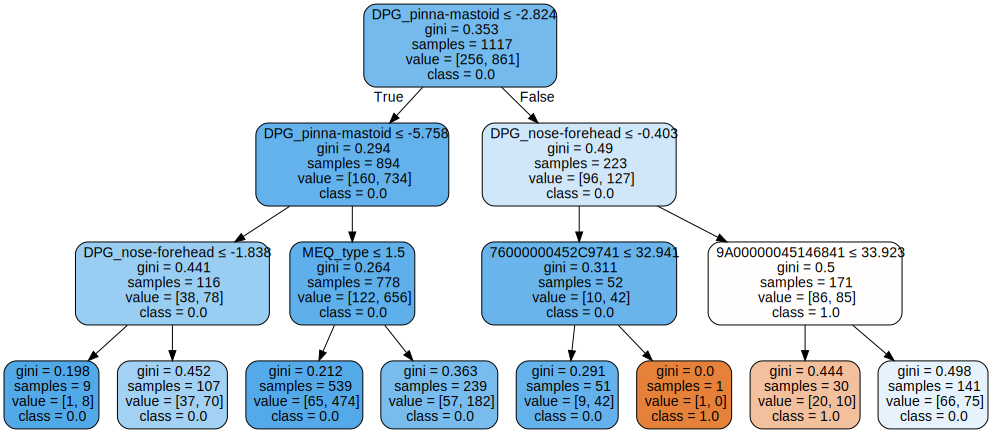

In [7]:
import graphviz

dot_data =  tree.export_graphviz(dt, out_file=None,
                                   feature_names=data_3.drop('results', axis=1).columns,
                                   class_names=data_3['results'].unique().astype(str),
                                   filled=True, rounded=True,
                                   special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [8]:
final = ''
fi = ''
for i, column in enumerate(data_3.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final = pd.concat([final, fi], ignore_index=True)
    except:
        final = fi

# Ordering the data
final_fi = final.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi

Importance of feature Age:, 0.000
Importance of feature Gender:, 0.000
Importance of feature PSQI:, 0.000
Importance of feature MEQ_type:, 0.102
Importance of feature 9A00000045146841:, 0.043
Importance of feature F9000000452CCF41:, 0.000
Importance of feature 76000000452C9741:, 0.030
Importance of feature 7200000045201D41:, 0.000
Importance of feature 4B0000004516B141:, 0.000
Importance of feature CB000000452D7441:, 0.000
Importance of feature DPG_finger-chest:, 0.000
Importance of feature DPG_nose-forehead:, 0.191
Importance of feature DPG_pinna-mastoid:, 0.633
Importance of feature FLIR_forehead:, 0.000
Importance of feature FLIR_nose:, 0.000
Importance of feature FLIR_DPG_nose-forehead:, 0.000


,index,Variable,Feature Importance Score
0,12,DPG_pinna-mastoid,0.633187
1,11,DPG_nose-forehead,0.191461
2,3,MEQ_type,0.102377
3,4,9A00000045146841,0.043390
4,6,76000000452C9741,0.029586
5,0,Age,0.000000
6,1,Gender,0.000000
7,2,PSQI,0.000000
8,5,F9000000452CCF41,0.000000
9,7,7200000045201D41,0.000000


In [9]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, Y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, Y_test))

Training Accuracy is:  0.7806624888093107
Testing Accuracy is:  0.7571428571428571


In [10]:
# Building a forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
# prediction_test = random_forest.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", random_forest.score(X_train, Y_train))
# Accuracy on Train
print("Testing Accuracy is: ", random_forest.score(X_test, Y_test))

Training Accuracy is:  0.8889883616830797
Testing Accuracy is:  0.7428571428571429


In [11]:
fi2 = ''
final2 = ''
for i, column in enumerate(data_3.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, random_forest.feature_importances_[i]))
    fi2 = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [random_forest.feature_importances_[i]]})

    try:
        final2 = pd.concat([final2, fi2], ignore_index=True)
    except:
        final2 = fi2

# Ordering the data
final_fi2 = final2.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi2

Importance of feature Age:, 0.006
Importance of feature Gender:, 0.001
Importance of feature PSQI:, 0.002
Importance of feature MEQ_type:, 0.011
Importance of feature 9A00000045146841:, 0.049
Importance of feature F9000000452CCF41:, 0.124
Importance of feature 76000000452C9741:, 0.051
Importance of feature 7200000045201D41:, 0.036
Importance of feature 4B0000004516B141:, 0.178
Importance of feature CB000000452D7441:, 0.094
Importance of feature DPG_finger-chest:, 0.188
Importance of feature DPG_nose-forehead:, 0.172
Importance of feature DPG_pinna-mastoid:, 0.075
Importance of feature FLIR_forehead:, 0.006
Importance of feature FLIR_nose:, 0.003
Importance of feature FLIR_DPG_nose-forehead:, 0.005


,index,Variable,Feature Importance Score
0,10,DPG_finger-chest,0.187710
1,8,4B0000004516B141,0.177907
2,11,DPG_nose-forehead,0.171683
3,5,F9000000452CCF41,0.124088
4,9,CB000000452D7441,0.094182
5,12,DPG_pinna-mastoid,0.074584
6,6,76000000452C9741,0.050896
7,4,9A00000045146841,0.048883
8,7,7200000045201D41,0.035590
9,3,MEQ_type,0.011014
